# Data Exploration for Sleep Dataset



Columns to drop:
- Person_ID - int
- Date - object [extracted Month from this column instead]

Features:
- Age - Numeric (discrete) - int
- Gender - Categorical (nominal) - object
- Sleep Start Time - Numeric (continous) - float
- Sleep End Time - Numeric (continous) - float
- Total Sleep Hours - Numeric (continous) - float
- Sleep Quality - Numeric (discrete) - int
- Exercise - Numeric (discrete) - int
- Caffeine intake - Numeric (discrete) - int
- Screentime before bed - Numeric (discrete) - int
- Work Hours (hrs/day) - Numeric (continuous) - float
- Month - Categorical (nominal) - object [created from the Date column]

Targets:
- Productivity Score - Numeric (discrete) - int
- Mood Score - Numeric (discrete) - int
- Stress Level - Numeric (discrete) - int

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import tree

from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

In [9]:
df_raw = pd.read_csv("sleep_cycle_productivity.csv")
display(df_raw.head(10))

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
5,2024-07-08,7439,38,Male,21.77,6.41,8.64,10,88,251,123,6.207993,1,9,7
6,2024-01-09,6463,18,Other,22.83,6.87,8.03,3,34,288,122,4.592357,7,10,9
7,2024-01-28,7278,26,Female,20.78,3.14,6.35,8,36,98,171,9.100460,3,1,3
8,2024-04-10,9110,31,Other,20.07,3.37,7.31,7,26,206,14,4.887127,3,7,1
9,2024-02-21,6116,49,Female,20.37,3.89,7.52,4,12,159,70,6.318012,6,2,10


In [10]:
# create new column for month based on date column
df_sleep = df_raw.copy()
df_sleep['Month'] = pd.to_datetime(df_raw['Date']).dt.month_name()

# drop date and studnet ID columns
df_sleep.drop(['Date', 'Person_ID'], axis=1, inplace=True)

In [11]:
display(df_sleep.head(10)) # redisplay the dataframe to see the new column 

,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Month
0,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6,April
1,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7,November
2,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10,August
3,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2,February
4,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9,February
5,38,Male,21.77,6.41,8.64,10,88,251,123,6.207993,1,9,7,July
6,18,Other,22.83,6.87,8.03,3,34,288,122,4.592357,7,10,9,January
7,26,Female,20.78,3.14,6.35,8,36,98,171,9.100460,3,1,3,January
8,31,Other,20.07,3.37,7.31,7,26,206,14,4.887127,3,7,1,April
9,49,Female,20.37,3.89,7.52,4,12,159,70,6.318012,6,2,10,February


In [12]:
df_sleep.info() # examine the data types and look for missing values

print(df_sleep.isna().sum())
print(f"Total missing: {df_sleep.isna().sum().sum()}")
print(f"Shape before dropping missing values: {df_sleep.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5000 non-null   int64  
 1   Gender                         5000 non-null   object 
 2   Sleep Start Time               5000 non-null   float64
 3   Sleep End Time                 5000 non-null   float64
 4   Total Sleep Hours              5000 non-null   float64
 5   Sleep Quality                  5000 non-null   int64  
 6   Exercise (mins/day)            5000 non-null   int64  
 7   Caffeine Intake (mg)           5000 non-null   int64  
 8   Screen Time Before Bed (mins)  5000 non-null   int64  
 9   Work Hours (hrs/day)           5000 non-null   float64
 10  Productivity Score             5000 non-null   int64  
 11  Mood Score                     5000 non-null   int64  
 12  Stress Level                   5000 non-null   i

### COMMENTS:
- No missing values

In [13]:
df_sleep.describe() # examine the summary statistics

,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


In [14]:
# print the number of unique values for each column

for col in df_sleep.columns:
    print(f"{col}: {df_sleep[col].nunique()} unique values")

Age: 42 unique values
Gender: 3 unique values
Sleep Start Time: 240 unique values
Sleep End Time: 817 unique values
Total Sleep Hours: 501 unique values
Sleep Quality: 10 unique values
Exercise (mins/day): 90 unique values
Caffeine Intake (mg): 300 unique values
Screen Time Before Bed (mins): 180 unique values
Work Hours (hrs/day): 5000 unique values
Productivity Score: 10 unique values
Mood Score: 10 unique values
Stress Level: 10 unique values
Month: 12 unique values


Categorical Features:  ['Gender', 'Month']


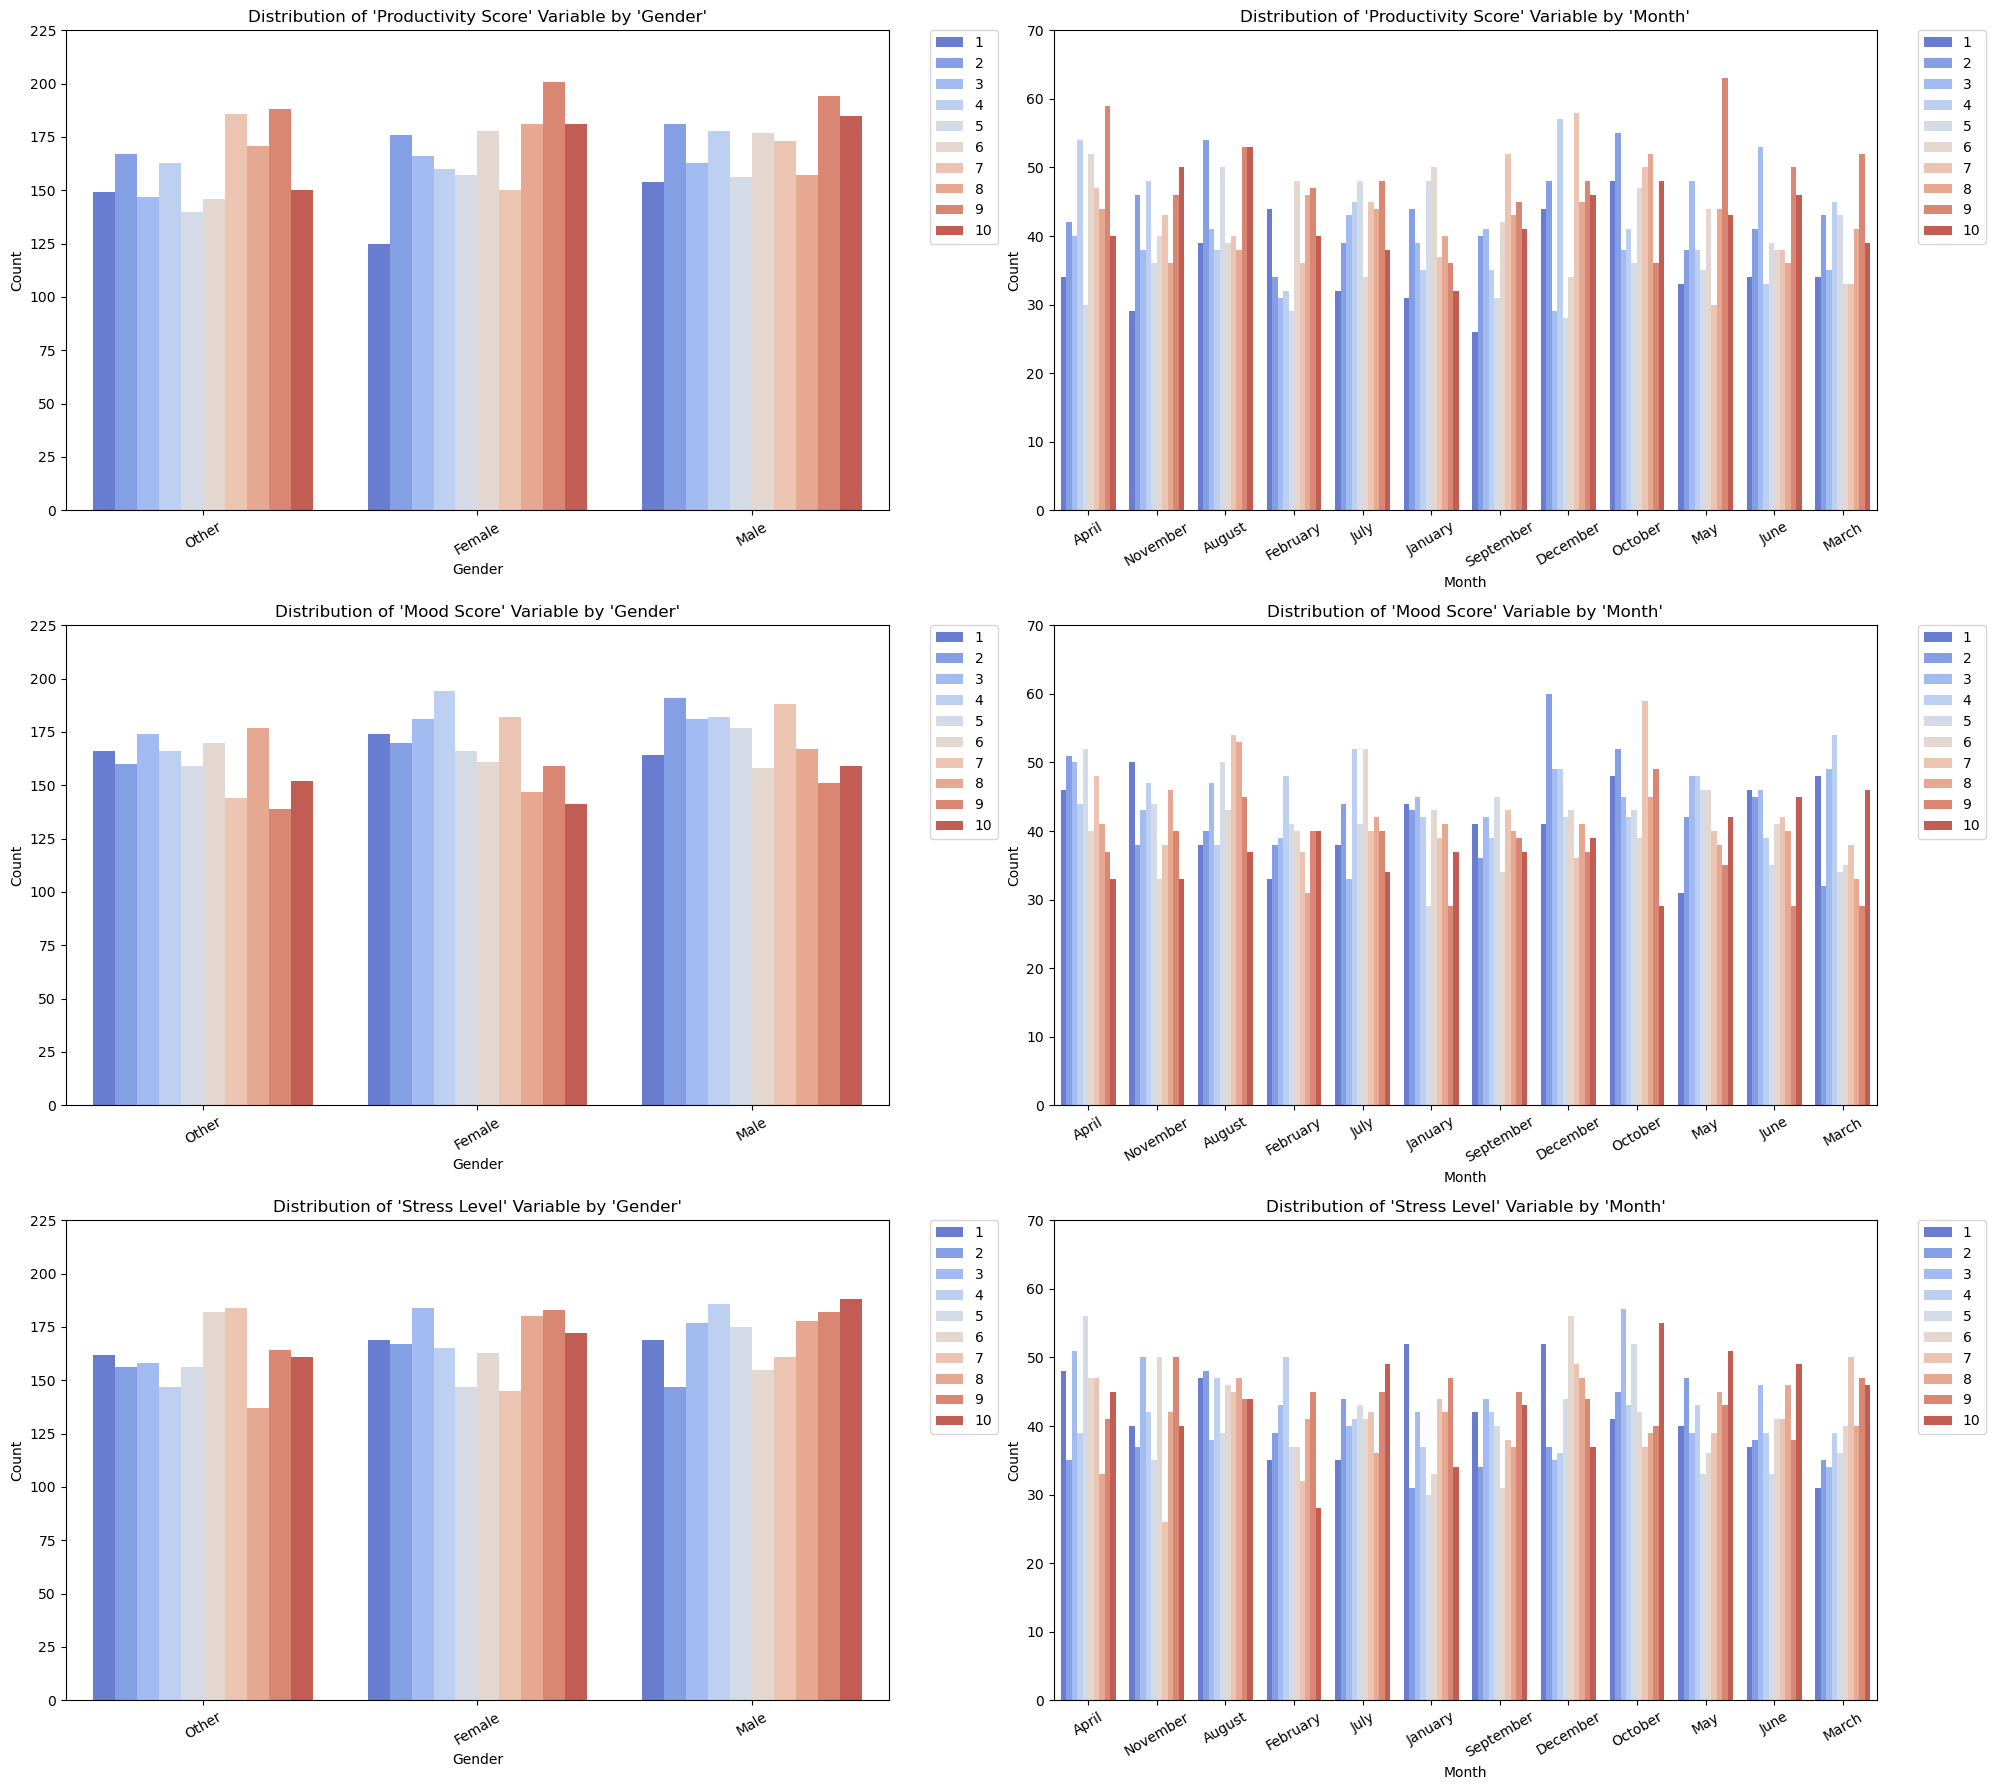

In [15]:
# select categorical features
categorical_features = df_sleep.select_dtypes(include='object').columns.tolist() 
print("Categorical Features: ", categorical_features)

# target variables
target_variables = ['Productivity Score', 'Mood Score', 'Stress Level']

n_plots = len(categorical_features) * len(target_variables)
n_cols = 2
# dynamically determine number of rows needed
n_rows = (n_plots // n_cols) + (1 if n_plots % n_cols != 0 else 0) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*6))
axes = axes.flatten()

idx = 0
# OPTIONS FOR palettes with 10 colors: 
palette_10 = sns.color_palette("coolwarm", n_colors=10) # force use of 10 colors in legend
for target in target_variables:
    for feature in categorical_features:
        sns.countplot(
            data=df_sleep, 
            x=feature, 
            hue=target,
            palette=palette_10,
            hue_order=range(1, 11),
            ax=axes[idx]
        )
        axes[idx].set_title(f"Distribution of '{target}' Variable by '{feature}'")
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel("Count")
        if feature == 'Gender':
            axes[idx].set_ylim(0, 225)
        elif feature == 'Month':
            axes[idx].set_ylim(0, 70)
        axes[idx].legend(
            loc='upper left',         
            bbox_to_anchor=(1.05, 1), # moves legend outside the axes
            borderaxespad=0.
        )   
        plt.setp(axes[idx].get_xticklabels(), rotation=30)
        idx += 1


plt.tight_layout()
plt.show()

### COMMENTS
- There is no immediately notable differences in distribution of the 3 target variables (Productivity Score, Mood Score, Stress Level) across the various categorical features.

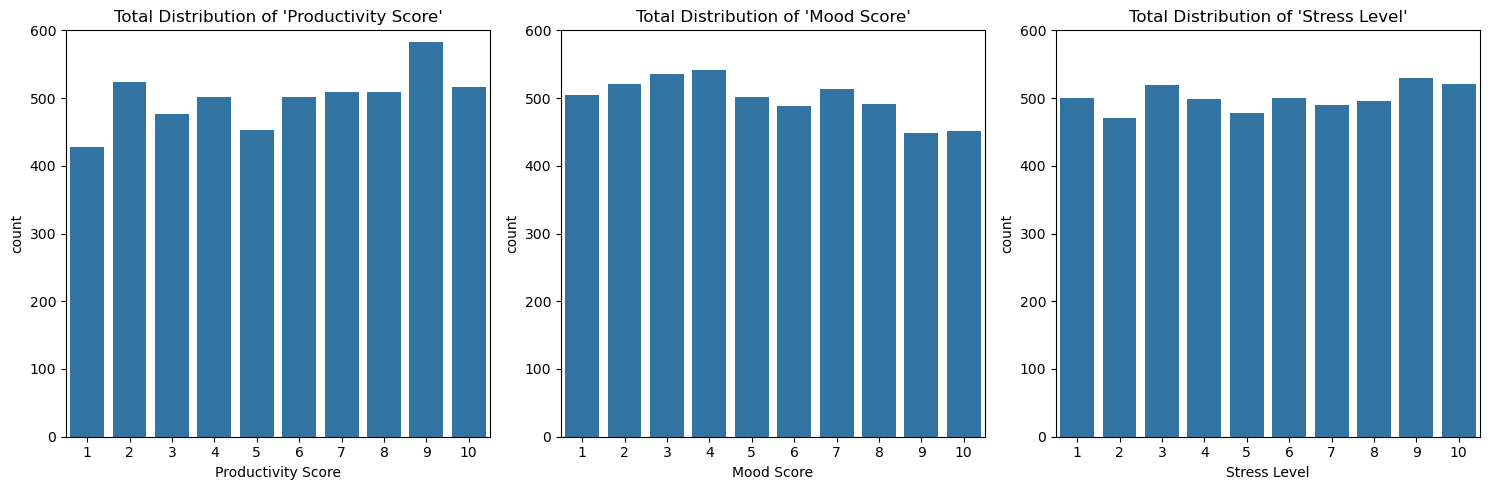

In [16]:
# overall distribution of the target variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(target_variables):
    sns.countplot(data=df_sleep, x=var, ax=axes[i])
    axes[i].set_ylim(0, 600)
    axes[i].set_title(f"Total Distribution of '{var}'")

plt.tight_layout()
plt.show()

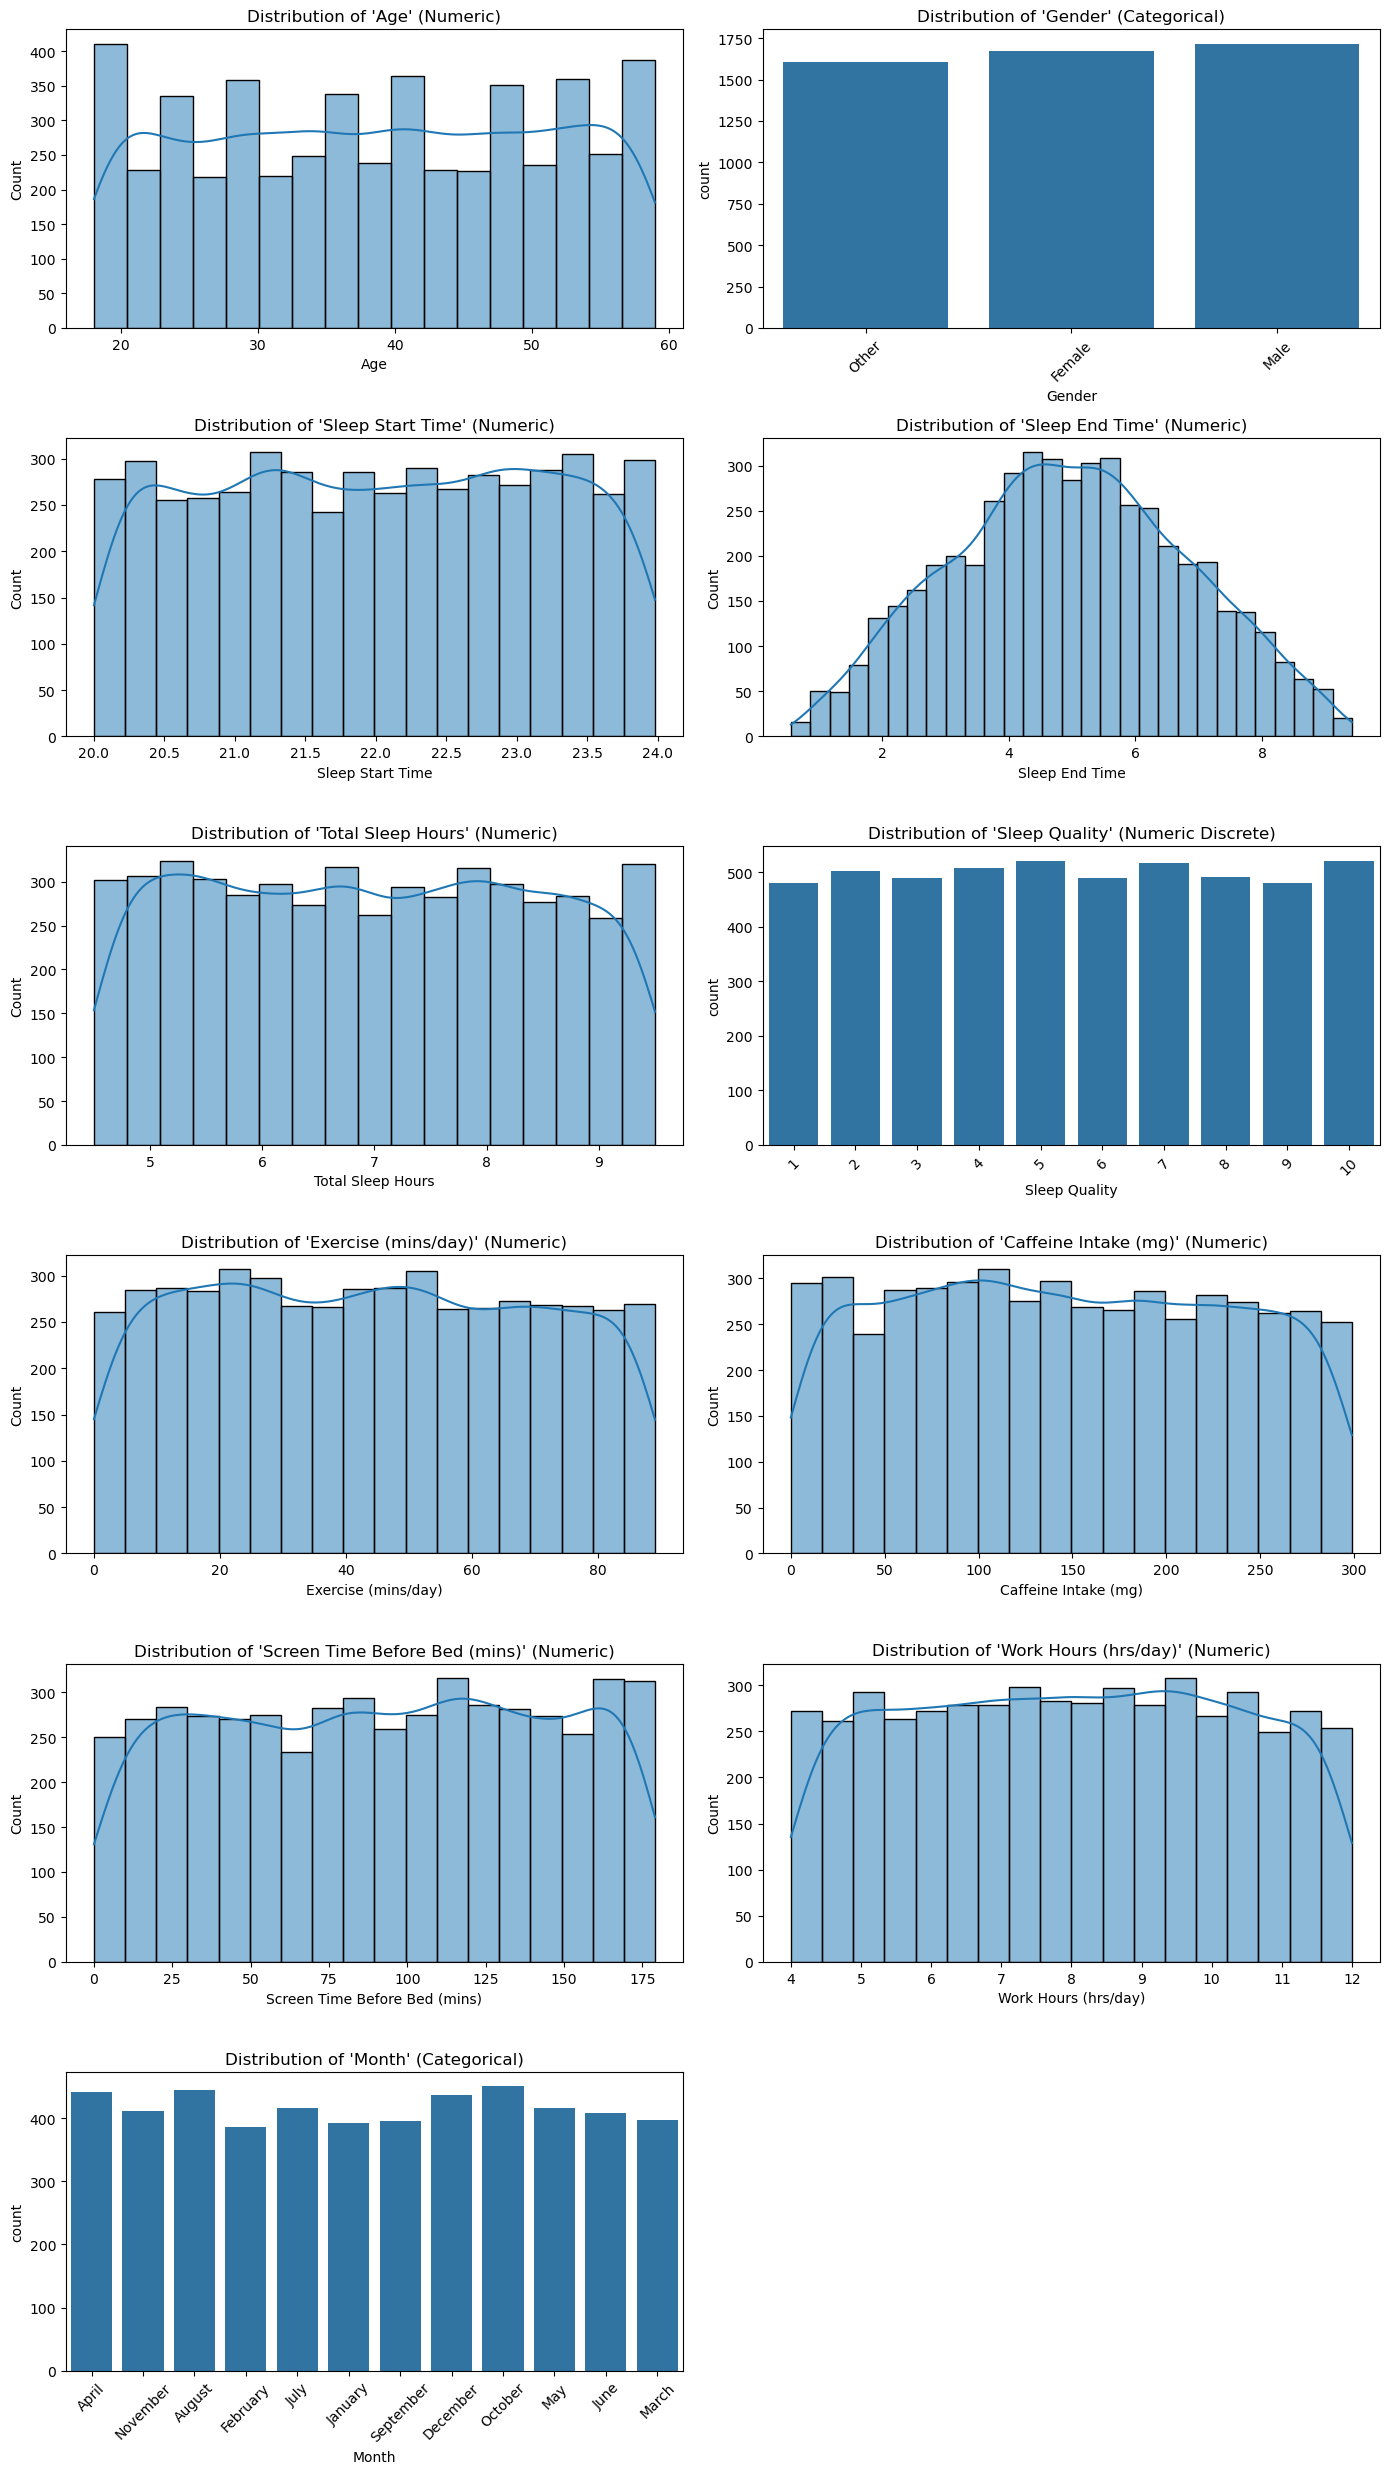

In [17]:
fig, axes = plt.subplots(7, 2, figsize=(14, 28))
axes = axes.flatten()

filtered_columns = [col for col in df_sleep.columns if col not in target_variables]

for i, col in enumerate(filtered_columns):
    if df_sleep[col].dtype == 'object':
        sns.countplot(data=df_sleep, x=col, ax=axes[i])
        axes[i].set_title(f"Distribution of '{col}' (Categorical)") # countplot if categorical
        plt.setp(axes[i].get_xticklabels(), rotation=45)
    elif col == 'Sleep Quality':
        sns.countplot(data=df_sleep, x=col, ax=axes[i])
        axes[i].set_title(f"Distribution of '{col}' (Numeric Discrete)") # countplot for sleep quality (discrete)
        plt.setp(axes[i].get_xticklabels(), rotation=45)
    else:
        sns.histplot(data=df_sleep, x=col, kde=True, ax=axes[i]) # histogram if numerical
        axes[i].set_title(f"Distribution of '{col}' (Numeric)")

# remove empty plots
for i in range(len(filtered_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

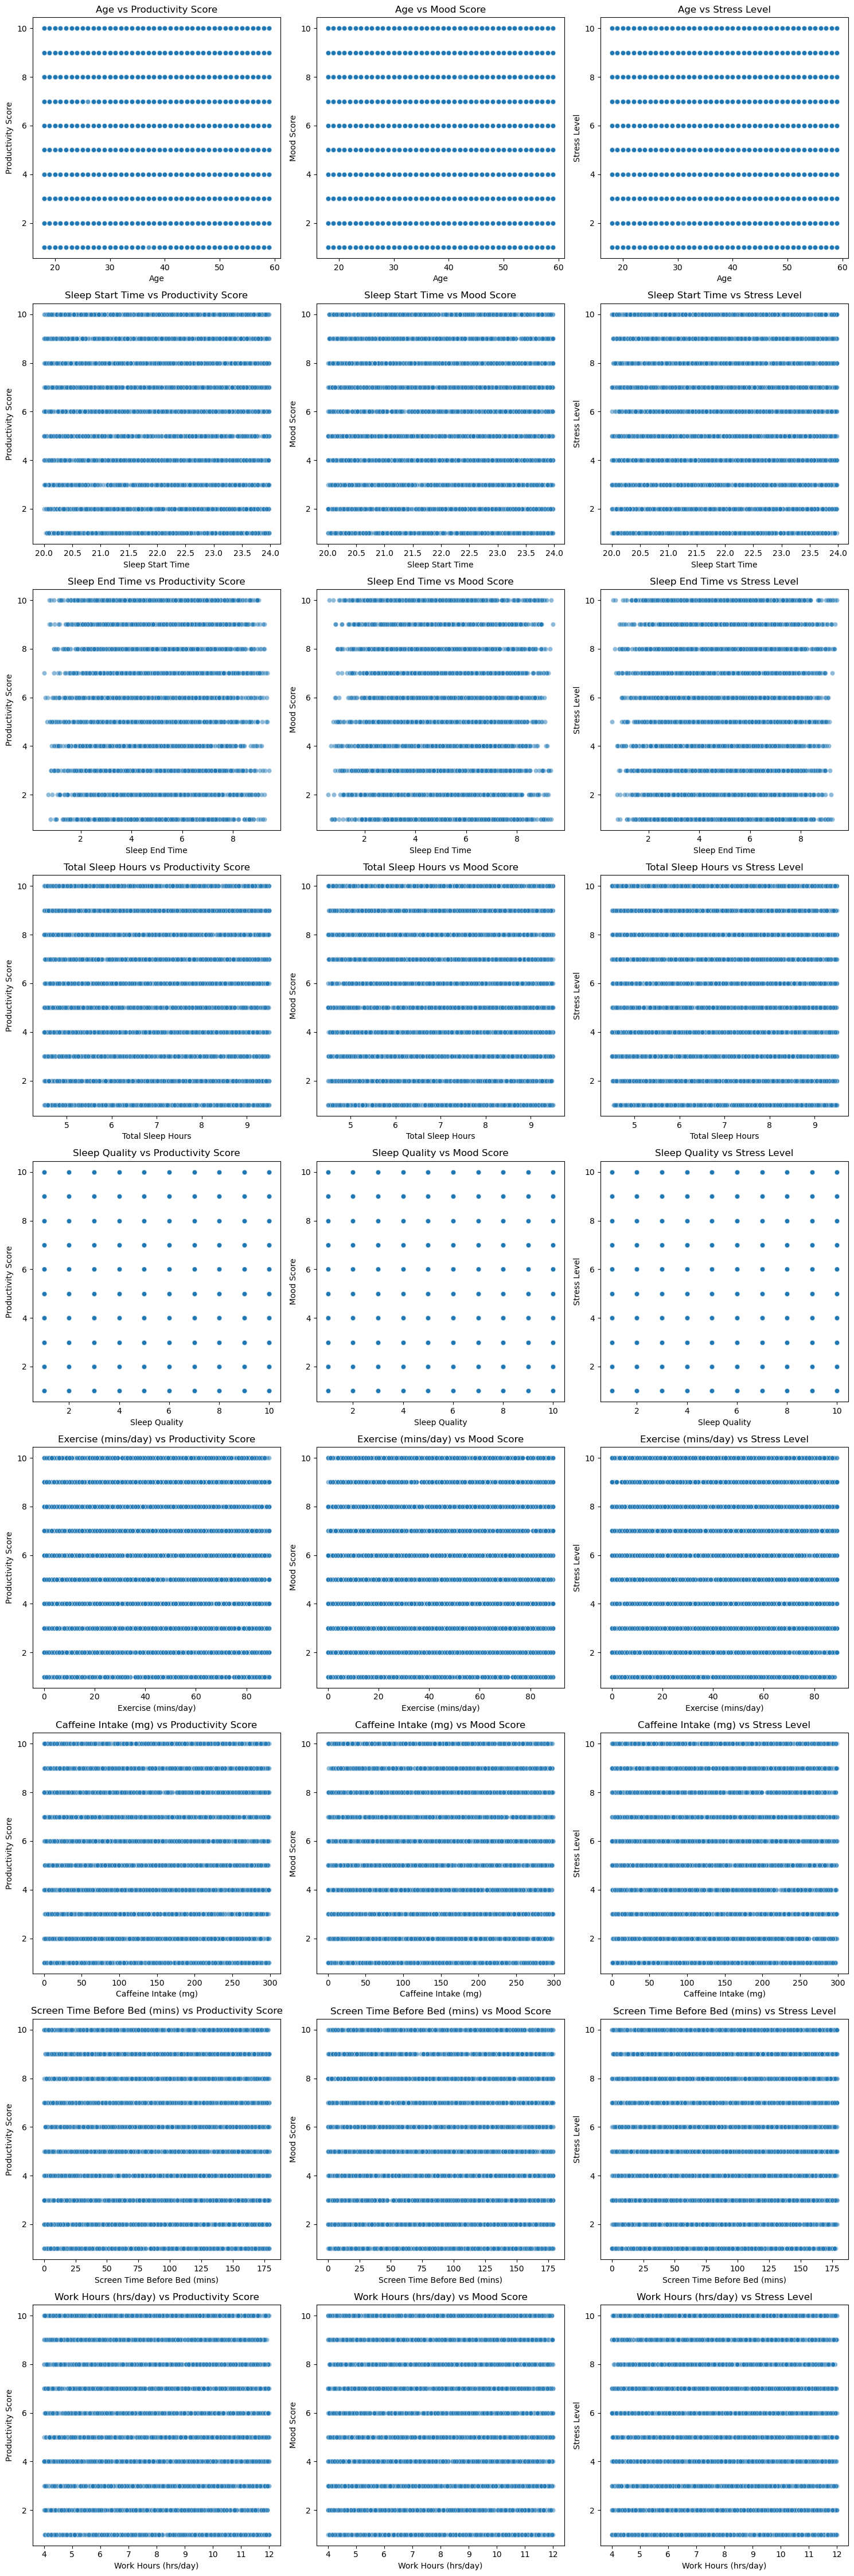

In [18]:
numeric_features = [
    'Age', 'Sleep Start Time', 'Sleep End Time',
    'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
    'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)',
    'Work Hours (hrs/day)'
]

fig, axes = plt.subplots(len(numeric_features), len(target_variables), figsize=(15, 45))
for i, feature in enumerate(numeric_features):
    for j, target in enumerate(target_variables):
        sns.scatterplot(data=df_sleep, x=feature, y=target, ax=axes[i, j], alpha=0.5)
        axes[i, j].set_title(f"{feature} vs {target}")
plt.tight_layout()
plt.show()

### COMMENTS
- There does not appear to be any easily discernible pattern to the relationship betwen numeric features and the numeric target variables.
- Furthermore, scatterplots don't seem to be the most useful due to the fact that many of the numeric features (and all 3 of the target variables) are discrete rather than continuous, resulting in grids.

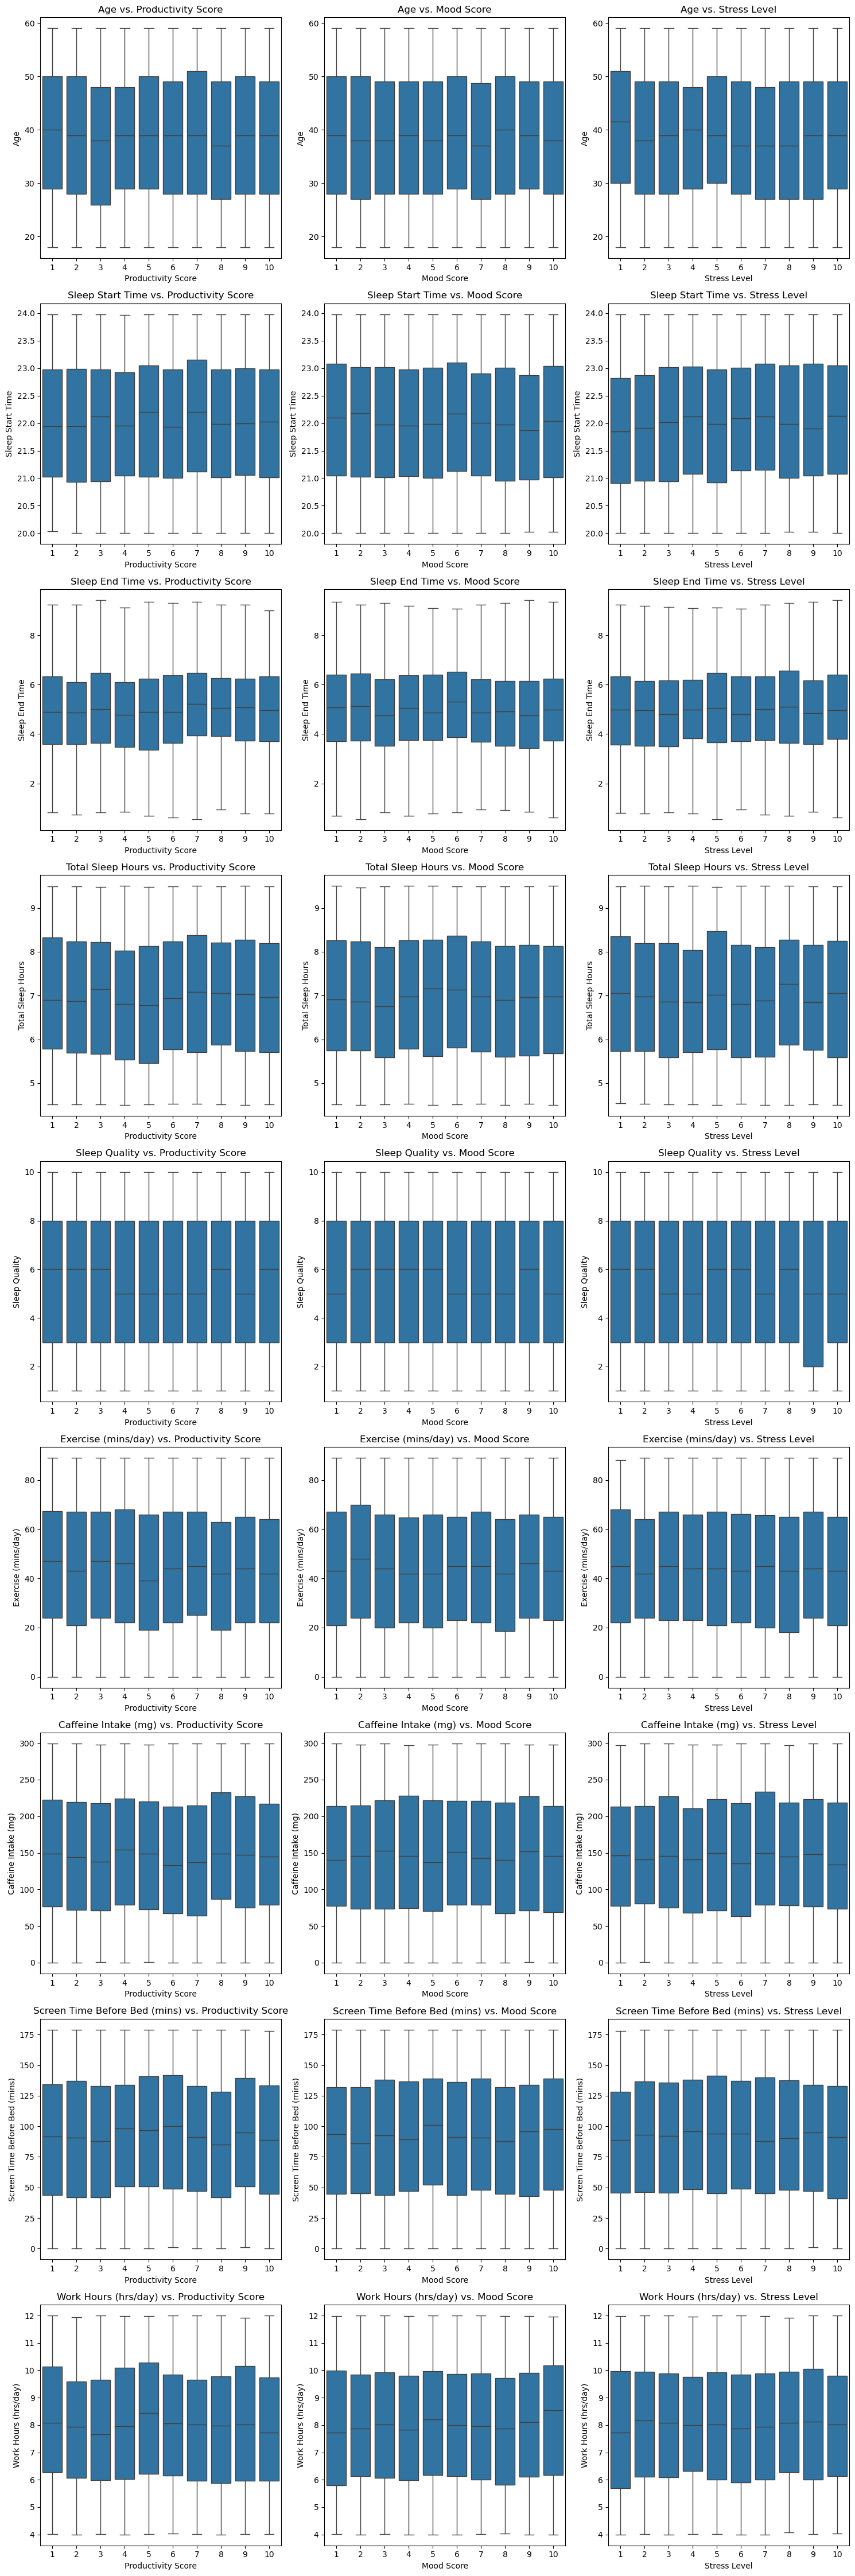

In [19]:
# box and strip plots for numeric features
fig, axes = plt.subplots(len(numeric_features), len(target_variables), figsize=(15, 45))

for i, feature in enumerate(numeric_features):
    for j, target in enumerate(target_variables):
        sns.boxplot(data=df_sleep, x=target, y=feature, ax=axes[i, j])
        # sns.stripplot(data=df_sleep, x=target, y=feature, color="black", alpha=0.5, ax=axes[i, j]) # overlay a strip/swarm plot to visualize individual points
        
        axes[i, j].set_title(f"{feature} vs. {target}")

plt.tight_layout()
plt.show()

### COMMENTS
- As with the scatterplots, there does not appear to be any easily discernible pattern to the relationship betwen numeric features and the numeric target variables in these boxplots.

In [20]:
# data splitting

X = df_sleep.drop(columns=["Productivity Score", "Mood Score", "Stress Level"]) # drop target variables
y = df_sleep[["Productivity Score", "Mood Score", "Stress Level"]] # df with target variables

# use single split for X and y
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# slice out each target from y_dev / y_test
y_dev_productivity = y_dev["Productivity Score"]
y_test_productivity = y_test["Productivity Score"]

y_dev_mood = y_dev["Mood Score"]
y_test_mood = y_test["Mood Score"]

y_dev_stress = y_dev["Stress Level"]
y_test_stress = y_test["Stress Level"]


In [21]:
# ohe encoding for categorical features
X_dev_ohe = pd.get_dummies(X_dev, dummy_na=False, dtype=int, drop_first=True) 
X_test_ohe = pd.get_dummies(X_test, dummy_na=False, dtype=int, drop_first=True) 

display(X_dev_ohe.head(10))

,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Gender_Male,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
4227,55,23.98,4.95,4.97,7,24,24,57,10.077992,0,...,0,0,0,0,0,1,0,0,0,0
4676,53,22.07,3.18,5.12,5,19,62,44,8.751117,1,...,0,1,0,0,0,0,0,0,0,0
800,44,23.62,5.39,5.77,3,9,119,144,4.358011,1,...,0,0,0,1,0,0,0,0,0,0
3671,31,21.07,2.08,5.02,9,53,222,143,5.085702,1,...,0,0,0,0,0,0,0,1,0,0
4193,26,21.02,6.32,9.30,5,68,261,47,4.572558,1,...,0,0,0,0,0,0,1,0,0,0
2968,40,23.93,5.58,5.65,10,30,134,6,10.251146,1,...,0,0,0,0,0,0,0,0,1,0
4793,32,21.93,6.97,9.04,9,13,263,75,6.185631,0,...,0,0,0,0,0,0,0,0,0,0
4368,49,22.22,3.42,5.20,9,15,136,67,5.429528,0,...,0,0,0,0,0,0,0,0,0,1
2776,42,20.07,2.86,6.80,6,46,233,24,7.403075,1,...,0,1,0,0,0,0,0,0,0,0
2970,32,21.80,4.40,6.60,1,18,131,81,6.075478,0,...,0,0,0,0,0,0,1,0,0,0


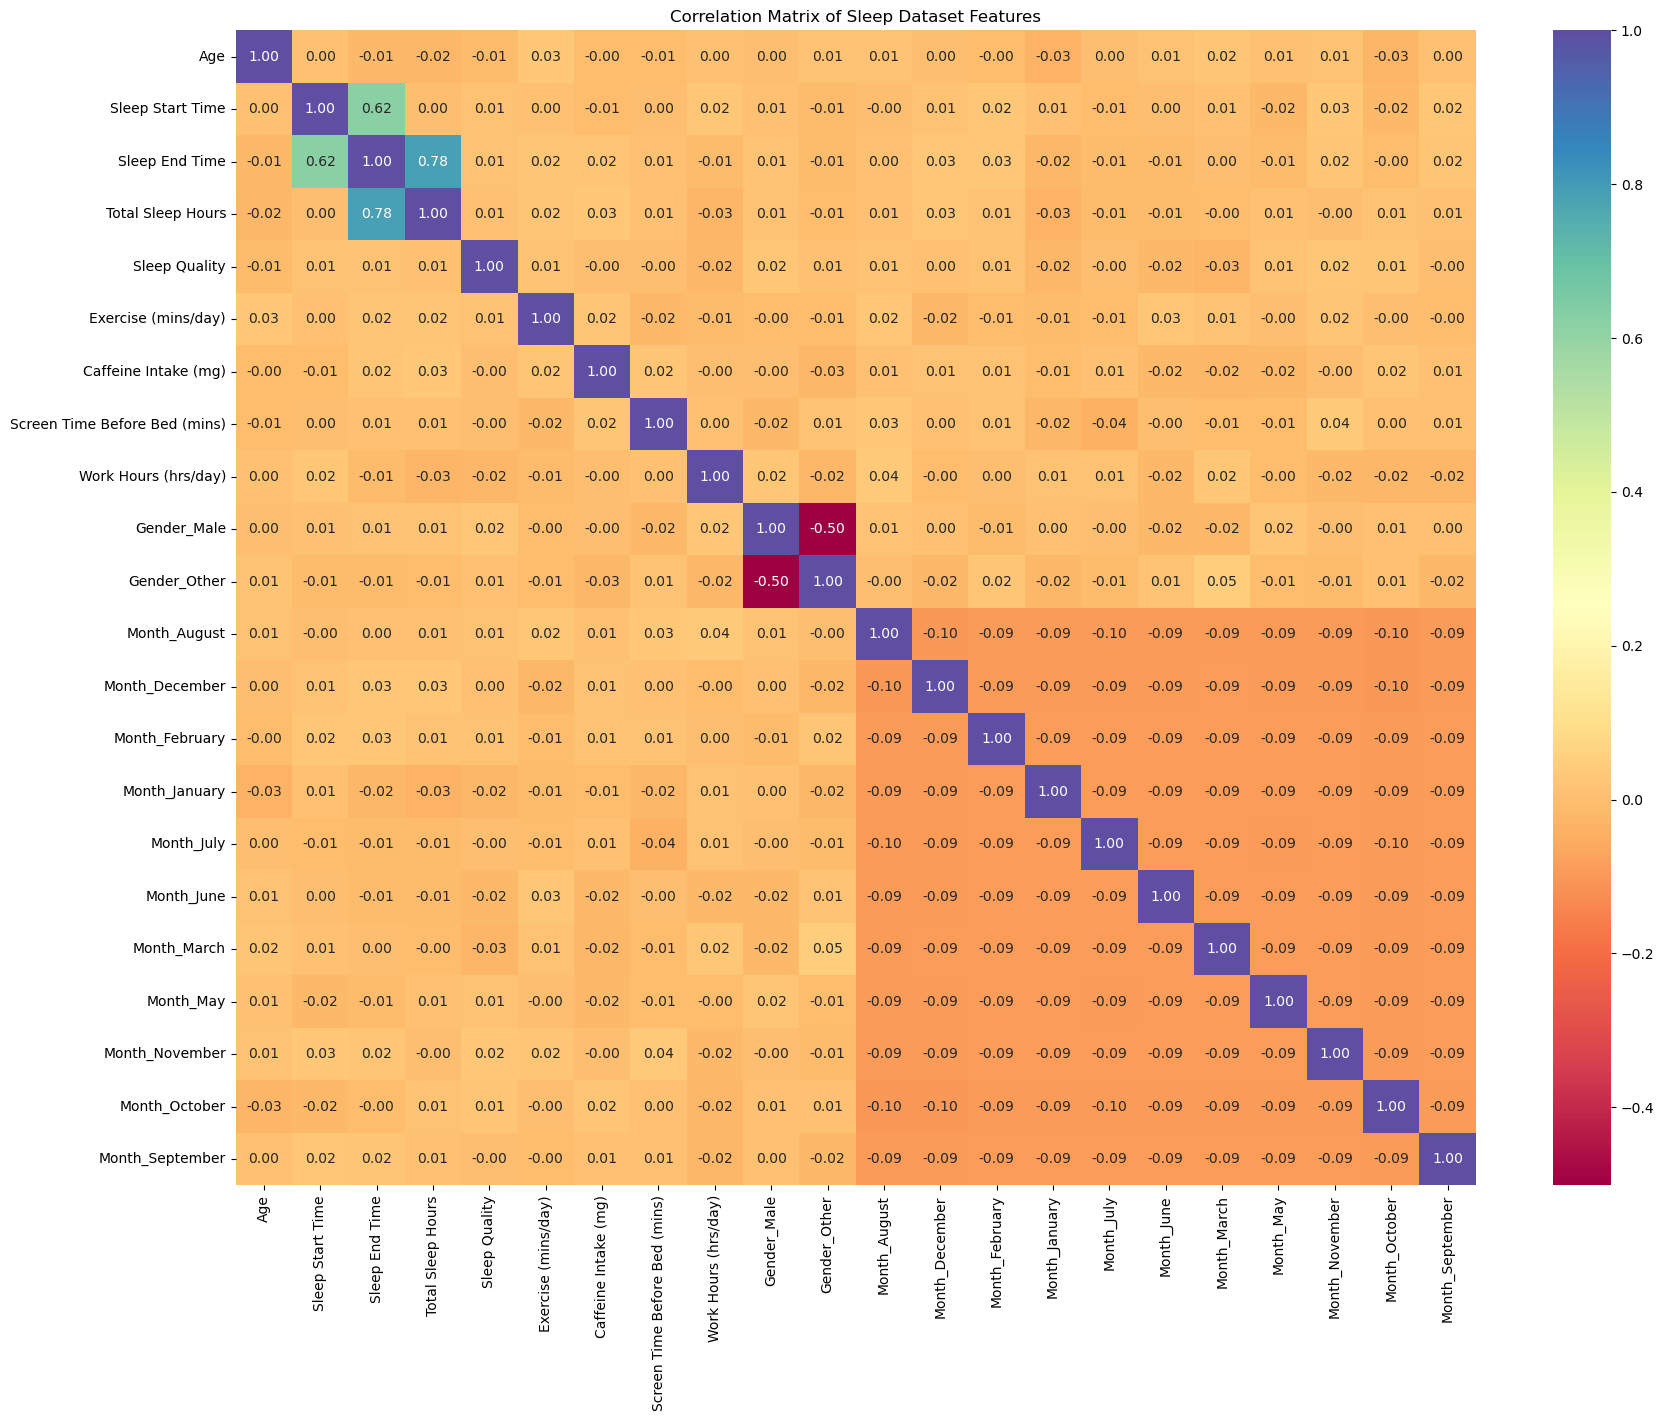

In [22]:
# Correlation matrix

corr = X_dev_ohe.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='Spectral', fmt='.2f') 
plt.title('Correlation Matrix of Sleep Dataset Features')
plt.show()